In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc # 한글 폰트 사용

plt.rcParams["font.family"] = "malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data_map_korea = pd.read_csv('data/data_map_korea.csv', index_col=0, encoding='UTF-8')
data_map_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [4]:
data_map_korea.shape

(229, 7)

In [11]:
data_map_korea.shortName.values # 고성(강원), 고성(경남)

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천',
       '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남', '수원', '시흥',
       '안산', '안성', '안양', '양주', '양평', '여주', '연천', '오산', '용인', '의왕', '의정부',
       '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해',
       '남해', '밀양', '사천', '산청', '양산', '의령', '진주', '창녕', '창원', '통영', '하동',
       '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '문경', '봉화',
       '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성',
       '청도', '청송', '칠곡', '포항', '광주광산', '광주남구', '광주동구', '광주북구', '광주서구',
       '대구남구', '대구달서', '대구달성', '대구동구', '대구북구', '대구서구', '대구수성', '대구중구',
       '대전대덕', '대전동구', '대전서구', '대전유성', '대전중구', '부산강서', '부산금정', '부산기장',
       '부산남구', '부산동구', '부산동래', '부산부산진', '부산북구', '부산사상', '부산사하', '부산서구',
       '부산수영', '부산연제', '부산영도', '부산중구', '부산해운대', '서울강남', '서울강동', '서울강북',
       '서울강서', '서울관악', '서울광진', '서울구로', '서울금천', '서울노원', '서울도봉

In [ ]:
# str 네 글자: 광주 대구, 대전, 부산, 서울, 울산, 인천 -> 앞의 두글자 지움
# str 다섯글자: 서울동대문, 서울서대문, 서울영등포, 부산부산진, 부산해운대 -> 앞의 두글자 지우기
# str 6글자 이상 : 고성(강원), 고성(경남)

In [9]:
# 맵을 그리기위한 코드-> 함수

def mapping(targetData, blockedMap, d1, d2, cmapname):
    blockedMap = data_map_korea
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
# for문 변형함 #####################################################################################
        # # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        # if row[d1].endswith('시') and not row[d1].startswith('세종'):
        #     dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
        #     if len(row[d2]) <= 2:
        #         dispname += row[d2][-1]
        # else:
        #     dispname = row[d2][:-1]
#####################################################################################
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = f'{row[d2][:-1]}'
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

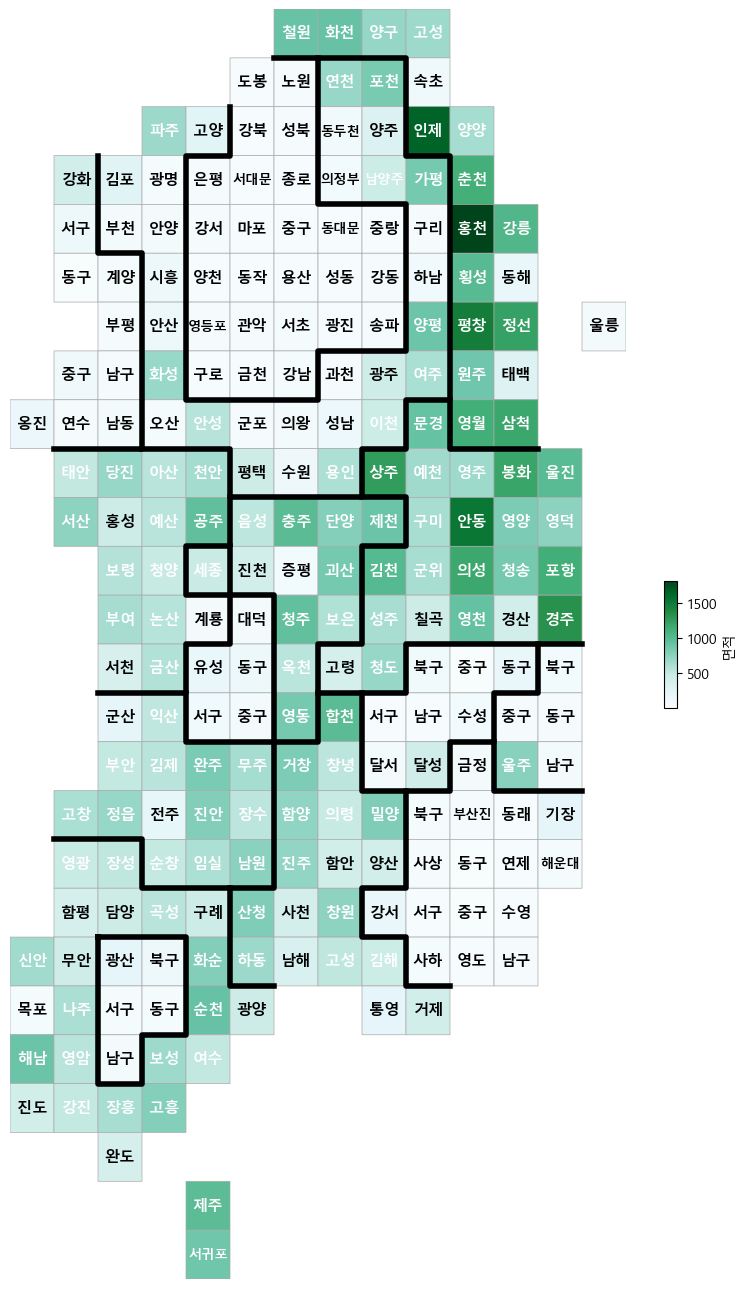

In [22]:
# 함수실행__ mapping(targetData, blockedMap, d1, d2, cmapname)
# 면적 넓이에 따른 지도
mapping('면적', data_map_korea, '광역시도', '행정구역', 'BuGn')

In [14]:
data_map_korea.shortName[20:35]

20     과천
21     광명
22     광주
23     구리
24     군포
25     김포
26    남양주
27    동두천
28     부천
29     성남
30     수원
31     시흥
32     안산
33     안성
34     안양
Name: shortName, dtype: object

In [6]:
data_map_korea.isna().sum().sum()

0

In [37]:
data_map_korea.to_csv('data/map_korea_0630.csv', index=False)

In [ ]:
######### 이제 신혼부부에서 '행정구역' 데이터를 위처럼 바꾼 후 merge하면 됨 #########

In [4]:
df = pd.read_csv('data/신혼부부.csv', encoding='UTF-8', sep=',')
df.head(3)

,행정구역,신혼수_21,신혼증감_21,신혼증감률_21
0,전국,871428,-66652,-7.1
1,서울특별시,172850,-15940,-8.4
2,서울특별시 종로구,1851,-238,-11.4


In [6]:
############## 신혼부부 행정구역을 다시 나누기(data_map_korea와 맞춤) ##########

In [5]:
korea = df['행정구역'].str.split()
korea

0                 [전국]
1              [서울특별시]
2         [서울특별시, 종로구]
3          [서울특별시, 중구]
4         [서울특별시, 용산구]
            ...       
274        [경상남도, 거창군]
275        [경상남도, 합천군]
276          [제주특별자치도]
277     [제주특별자치도, 제주시]
278    [제주특별자치도, 서귀포시]
Name: 행정구역, Length: 279, dtype: object

In [6]:
korea[4][-1]

'용산구'

In [7]:
korea[4][-1][:-1]

'용산'

In [27]:
df.head(2)

,행정구역,신혼수_21,신혼증감_21,신혼증감률_21,광역시도,shortName
0,전국,871428,-66652,-7.1,전국,전국
1,서울특별시,172850,-15940,-8.4,서울특별시,서울특별


In [8]:
####### 광역시도//행정구역 나누기

# 공백 기준 리스트로 만들기 -> [-1]이 "소계"이면 삭제
dist1_list= []
dist2_list= []
for i in range(len(df.index)):
    if len(korea[i]) <= 2 :  # 리스트 요소가 2개 이하이면
        dist1_list.append(korea[i][0])
        dist2_list.append(korea[i][-1])
    else:
        print(korea[i])     # 시도 1개 또는 시도//시군구 2개 요소까지만 있음


In [23]:
df['광역시도'] = dist1_list
df['행정구역'] = dist2_list

In [10]:
df.행정구역[5]

'성동구'

In [11]:
df.광역시도

0           전국
1        서울특별시
2        서울특별시
3        서울특별시
4        서울특별시
        ...   
274       경상남도
275       경상남도
276    제주특별자치도
277    제주특별자치도
278    제주특별자치도
Name: 광역시도, Length: 279, dtype: object

In [12]:
df.행정구역[5][:-1]

'성동'

In [ ]:
##### shortName 추출하는 반복문 ####

name_list= []
for i in range(len(df.index)):
    korea = df['행정구역'].str.split()
    if len(korea[i][-1]) <= 2 :  # 시군구 str길이가 2 이하면
        name_list.append(korea[i][-1]) # 시군구 생략없이 포함
    else:
        name_list.append(korea[i][-1][:-1])
name_list


In [26]:
df['shortName'] = name_list

In [28]:
df.shortName

0          전국
1        서울특별
2          종로
3          중구
4          용산
        ...  
274        거창
275        합천
276    제주특별자치
277        제주
278       서귀포
Name: shortName, Length: 279, dtype: object

In [31]:
df = df[df['행정구역'] != df['광역시도']].reset_index(drop=True)
df.head()

,행정구역,신혼수_21,신혼증감_21,신혼증감률_21,광역시도,shortName
0,종로구,1851,-238,-11.4,서울특별시,종로
1,중구,2421,-277,-10.3,서울특별시,중구
2,용산구,4622,-140,-2.9,서울특별시,용산
3,성동구,6754,-876,-11.5,서울특별시,성동
4,광진구,5806,-751,-11.5,서울특별시,광진


In [39]:
# ####### 컬럼 위치 전체 수정하는 법(globally)
df = df.reindex(columns=['광역시도','행정구역','shortName','신혼수_21','신혼증감_21' ,'신혼증감률_21'])
df.head(2)

,광역시도,행정구역,shortName,신혼수_21,신혼증감_21,신혼증감률_21
0,서울특별시,종로구,종로,1851,-238,-11.4
1,서울특별시,중구,중구,2421,-277,-10.3


In [46]:
df.isna().sum().sum()

0

In [40]:
######### 저장
df.to_csv('data/신혼부부_0630.csv', index=False)